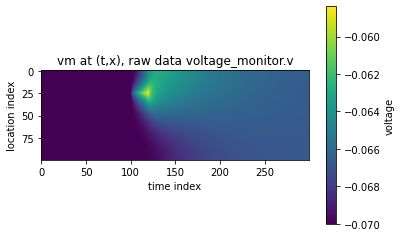

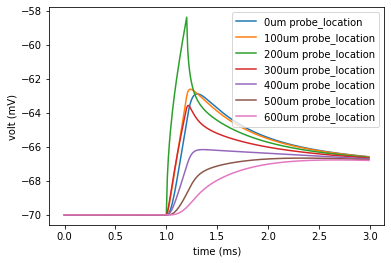

In [7]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex3.cable_equation import passive_cable
from neurodynex3.tools import input_factory
import math


def fast_plot(voltage_monitor):
    plt.figure()
    plt.imshow(voltage_monitor.v / b2.volt)
    plt.colorbar(label="voltage")
    plt.xlabel("time index")
    plt.ylabel("location index")
    plt.title("vm at (t,x), raw data voltage_monitor.v")
    plt.show()



current = input_factory.get_step_current(10, 11, 0.1 * b2.ms, 0.8 * b2.nA)
voltage_monitor, cable_model = passive_cable.simulate_passive_cable(
    length=800 * b2.um, current_injection_location=[200 * b2.um], input_current=current,
    nr_compartments=100, simulation_time=3 * b2.ms)
fast_plot(voltage_monitor)

plt.figure()
for probe_location in (0, 100, 200, 300, 400, 500, 600):
    plt.plot(voltage_monitor.t / b2.ms,
             voltage_monitor[cable_model.morphology[probe_location*b2.um]].v / b2.mV,
             label='{}um probe_location'.format(probe_location))
plt.xlabel('time (ms)')
plt.ylabel('volt (mV)')
plt.legend()
plt.show()

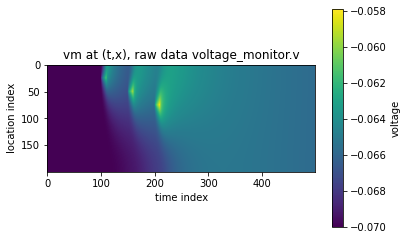

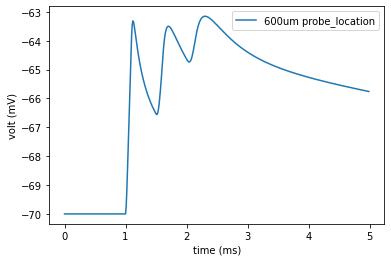

In [11]:
t_spikes = [10, 15, 20]
l_spikes = [100. * b2.um, 200. * b2.um, 300. * b2.um]
current = input_factory.get_spikes_current(t_spikes, 100*b2.us, 0.8*b2.namp, append_zero=True)
voltage_monitor_ABC, cable_model = passive_cable.simulate_passive_cable(length=800 * b2.um,
                                                                        current_injection_location=l_spikes,
                                                                        input_current=current,
                                                                        nr_compartments=200,
                                                                        simulation_time=5 * b2.ms)
fast_plot(voltage_monitor_ABC)
plt.figure()
plt.plot(voltage_monitor_ABC.t / b2.ms,
         voltage_monitor_ABC[cable_model.morphology[0*b2.um]].v / b2.mV,
         label='{}um probe_location'.format(probe_location))
plt.xlabel('time (ms)')
plt.ylabel('volt (mV)')
plt.legend()
plt.show()

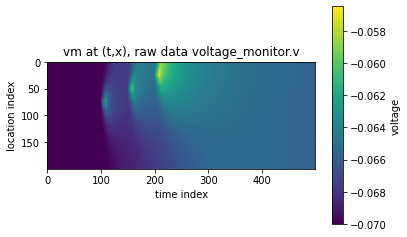

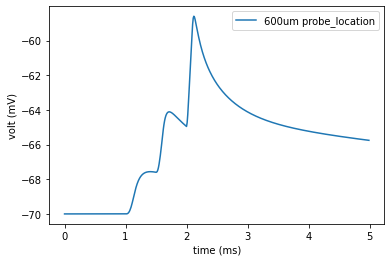

In [12]:
t_spikes = [10, 15, 20]
l_spikes = [300. * b2.um, 200. * b2.um, 100. * b2.um]
current = input_factory.get_spikes_current(t_spikes, 100*b2.us, 0.8*b2.namp, append_zero=True)
voltage_monitor_ABC, cable_model = passive_cable.simulate_passive_cable(length=800 * b2.um,
                                                                        current_injection_location=l_spikes,
                                                                        input_current=current,
                                                                        nr_compartments=200,
                                                                        simulation_time=5 * b2.ms)
fast_plot(voltage_monitor_ABC)
plt.figure()
plt.plot(voltage_monitor_ABC.t / b2.ms,
         voltage_monitor_ABC[cable_model.morphology[0*b2.um]].v / b2.mV,
         label='{}um probe_location'.format(probe_location))
plt.xlabel('time (ms)')
plt.ylabel('volt (mV)')
plt.legend()
plt.show()

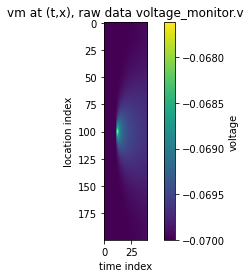

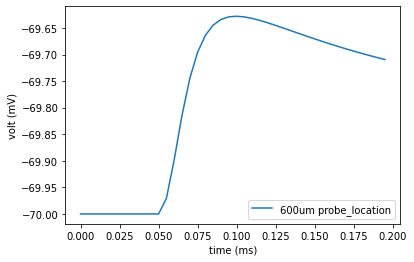

In [13]:
b2.defaultclock.dt = 0.005 * b2.ms
membrane_resistance_1 = 1.25 * b2.Mohm * b2.mm ** 2
membrane_capacitance_1 = 0.8 * b2.uF / b2.cm ** 2
current = input_factory.get_step_current(10, 11, 0.005 * b2.ms, 0.8 * b2.nA)
voltage_monitor, cable_model = passive_cable.simulate_passive_cable(
    length=800 * b2.um, current_injection_location=[400 * b2.um], input_current=current,
    nr_compartments=200, simulation_time=0.2 * b2.ms, r_transversal=membrane_resistance_1,
    capacitance=membrane_capacitance_1
)
fast_plot(voltage_monitor)

plt.figure()
plt.plot(voltage_monitor.t / b2.ms,
         voltage_monitor[cable_model.morphology[500*b2.um]].v / b2.mV,
         label='{}um probe_location'.format(probe_location))
plt.xlabel('time (ms)')
plt.ylabel('volt (mV)')
plt.legend()
plt.show()

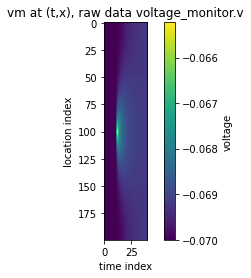

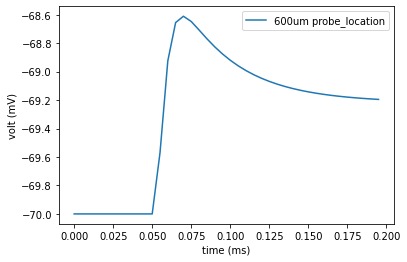

In [14]:
b2.defaultclock.dt = 0.005 * b2.ms
membrane_resistance_2 = 5.0 * b2.Mohm * b2.mm ** 2
membrane_capacitance_2 = 0.2 * b2.uF / b2.cm ** 2
current = input_factory.get_step_current(10, 11, 0.005 * b2.ms, 0.8 * b2.nA)
voltage_monitor, cable_model = passive_cable.simulate_passive_cable(
    length=800 * b2.um, current_injection_location=[400 * b2.um], input_current=current,
    nr_compartments=200, simulation_time=0.2 * b2.ms, r_transversal=membrane_resistance_2,
    capacitance=membrane_capacitance_2
)
fast_plot(voltage_monitor)

plt.figure()
plt.plot(voltage_monitor.t / b2.ms,
         voltage_monitor[cable_model.morphology[500*b2.um]].v / b2.mV,
         label='{}um probe_location'.format(probe_location))
plt.xlabel('time (ms)')
plt.ylabel('volt (mV)')
plt.legend()
plt.show()


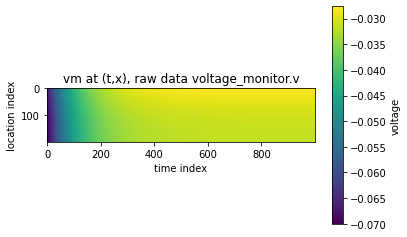

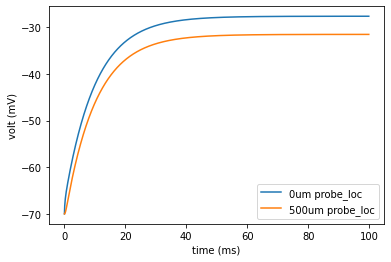

1.5811388300841898


In [20]:
b2.defaultclock.dt = 0.1 * b2.ms
current = input_factory.get_step_current(0, 0, unit_time=b2.ms, amplitude=0.1 * b2.namp, append_zero=False)
voltage_monitor, cable_model = passive_cable.simulate_passive_cable(
length=0.5 * b2.mm, current_injection_location = [0*b2.um],
input_current=current, simulation_time=100*b2.ms, nr_compartments=200)
v_X0 = voltage_monitor.v[0,:]  # access the first compartment
v_Xend = voltage_monitor.v[-1,:]  # access the last compartment
v_Tend = voltage_monitor.v[:, -1]  # access the last time step
fast_plot(voltage_monitor)
plt.figure()
plt.plot(voltage_monitor.t / b2.ms, v_X0 / b2.mV, label='0um probe_loc')
plt.plot(voltage_monitor.t / b2.ms, v_Xend / b2.mV, label='500um probe_loc')

plt.xlabel('time (ms)')
plt.ylabel('volt (mV)')
plt.legend()
plt.show()

print((passive_cable.R_TRANSVERSAL/passive_cable.R_LONGITUDINAL)**0.5)